In [12]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv("C:/Users/Ranjith/Downloads/train_LZdllcl.csv")

In [14]:
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [15]:
data.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [17]:
data = data[data.education.notnull()]

In [18]:
data = data[data.previous_year_rating.notnull()]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
department              54808 non-null object  ---------- >(categorical)
region                  54808 non-null object  -----------> (categorical)
education               52399 non-null object  ------------> (categorical)
gender                  54808 non-null object  -------------> (categorical)
recruitment_channel     54808 non-null object  ------------->(categorical)
no_of_trainings         54808 non-null int64   -------------->(discrete numerical)
age                     54808 non-null int64  ----------------> (discrete numeric)
previous_year_rating    50684 non-null float64 ---------------> (discrete numerical
length_of_service       54808 non-null int64   ---------------> (discrete numerical)
KPIs_met >80%           54808 non-null int64   ---------------> (categorical )
awards_won?             54808 non-null int64   ----------------> (categorical)
avg_training_score      54808 non-null int64   ----------------> (discrete numerical)
is_promoted             54808 non-null int64   ----------------> (label)
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB

In [20]:
data.drop(['employee_id'],inplace = True,axis=1)

In [21]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

# normality test 

In [22]:
#shapiro test
from scipy.stats import shapiro
stat,sl=shapiro(data['no_of_trainings'])

if(sl > 0.05):
    print("R&D spend is normally distributed")
else:
    print("R&D is not normally distributed")

R&D is not normally distributed


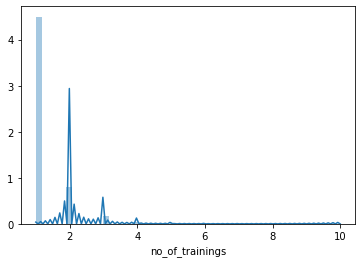

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.distplot(data['no_of_trainings'])

In [24]:
#normal test
from scipy.stats import normaltest
stat,sl=normaltest(data['no_of_trainings'])

if(sl > 0.05):
    print("R&D spend is normally distributed")
else:
    print("R&D is not normally distributed")

R&D is not normally distributed


In [25]:
#normal test
from scipy.stats import normaltest
stat,sl=normaltest(data['previous_year_rating'])

if(sl > 0.05):
    print("R&D spend is normally distributed")
else:
    print("R&D is not normally distributed")

R&D is not normally distributed


In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48607 entries, 0 to 54807
Data columns (total 13 columns):
department              48607 non-null object
region                  48607 non-null object
education               48607 non-null object
gender                  48607 non-null object
recruitment_channel     48607 non-null object
no_of_trainings         48607 non-null int64
age                     48607 non-null int64
previous_year_rating    48607 non-null float64
length_of_service       48607 non-null int64
KPIs_met >80%           48607 non-null int64
awards_won?             48607 non-null int64
avg_training_score      48607 non-null int64
is_promoted             48607 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [28]:
features=data.loc[:,['department','region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score','is_promoted']]

In [29]:
features.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [30]:
features['region']=features['region'].str.lower()

In [31]:
features['education']=features['education'].str.lower()
features.education.unique()

array(["master's & above", "bachelor's", 'below secondary'], dtype=object)

In [32]:
features.gender.unique()

array(['f', 'm'], dtype=object)

In [33]:
features.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [34]:
features['department']=features['department'].str.lower()
features.department.unique()

array(['sales & marketing', 'operations', 'technology', 'analytics',
       'r&d', 'procurement', 'finance', 'hr', 'legal'], dtype=object)

In [35]:
features.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [36]:
#load.CouncilArea.fillna(load.CouncilArea.mode()[0],inplace = True)
features.education.fillna(features.education.mode()[0],inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48607 entries, 0 to 54807
Data columns (total 13 columns):
department              48607 non-null object
region                  48607 non-null object
education               48607 non-null object
gender                  48607 non-null object
recruitment_channel     48607 non-null object
no_of_trainings         48607 non-null int64
age                     48607 non-null int64
previous_year_rating    48607 non-null float64
length_of_service       48607 non-null int64
KPIs_met >80%           48607 non-null int64
awards_won?             48607 non-null int64
avg_training_score      48607 non-null int64
is_promoted             48607 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [37]:
features.previous_year_rating.median()
features.previous_year_rating.fillna(features.previous_year_rating.median(),inplace=True)


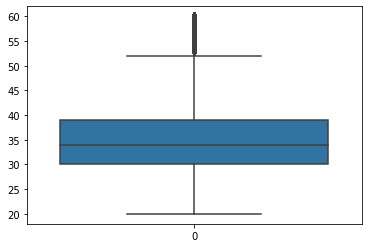

In [38]:
sns.boxplot(data=features['age'])

In [39]:
#Function that can detect outlier
def outlierDetection(datacolumn):
    #Sort in Ascending
    sorted(datacolumn)
    #Get Q3 and Q1
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [40]:
lr,ur = outlierDetection(features.age)

In [41]:
features[(features['age'] < lr) & (features['age'] > ur)]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [42]:
lr,ur = outlierDetection(features.length_of_service)

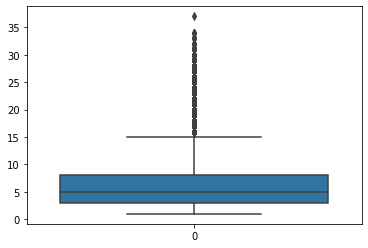

In [43]:
sns.boxplot(data=features.length_of_service)

In [44]:
features[(features['avg_training_score'] < lr) & (features['avg_training_score'] > ur)]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


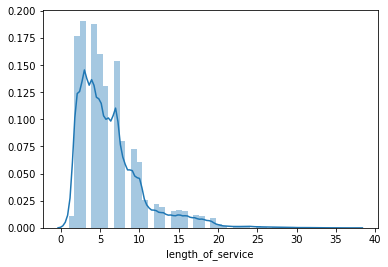

In [45]:
sns.distplot(features.length_of_service)

In [46]:
lables=features['is_promoted']

In [47]:
features.drop(['is_promoted'],axis=1,inplace=True)

In [48]:
features=features.loc[:,['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']].values

In [49]:
labels=lables

In [50]:
print(type(labels))

<class 'pandas.core.series.Series'>


In [51]:
test=labels.to_numpy()[np.newaxis]


In [52]:
test.T

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [53]:
#deal with categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
feature=np.copy(features)

In [54]:
deptlabelencoder = LabelEncoder()
#features[:,3]=statelabelencoder.fit_transform(features[:,3]) 
feature[:,0] = deptlabelencoder.fit_transform(feature[:,0])

In [72]:
deptlabelencoder.classes_

array(['analytics', 'finance', 'hr', 'legal', 'operations', 'procurement',
       'r&d', 'sales & marketing', 'technology'], dtype=object)

In [76]:
feature[0,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
       35.,  5.,  8.,  1.,  0., 49.])

In [55]:
regionlabelencoder = LabelEncoder()
feature[:,1] = regionlabelencoder.fit_transform(feature[:,1])

In [56]:
feature[0,:]

array([7, 31, "master's & above", 'f', 'sourcing', 1, 35, 5.0, 8, 1, 0,
       49], dtype=object)

In [57]:
educationlabelencoder = LabelEncoder()
feature[:,2] = educationlabelencoder.fit_transform(feature[:,2])

In [58]:
feature[0,:]

array([7, 31, 2, 'f', 'sourcing', 1, 35, 5.0, 8, 1, 0, 49], dtype=object)

In [59]:
genderlabelencoder = LabelEncoder()
feature[:,3] = genderlabelencoder.fit_transform(feature[:,3])

In [60]:
feature[0,:]

array([7, 31, 2, 0, 'sourcing', 1, 35, 5.0, 8, 1, 0, 49], dtype=object)

In [61]:
recruitlabelencoder = LabelEncoder()
feature[:,4] = recruitlabelencoder.fit_transform(feature[:,4])

In [62]:
feature[0,:]

array([7, 31, 2, 0, 2, 1, 35, 5.0, 8, 1, 0, 49], dtype=object)

In [63]:
stateohe = OneHotEncoder(categorical_features=[0,1,2,3,4])
feature = stateohe.fit_transform(feature).toarray()

C:\Users\Ranjith\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Ranjith\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [64]:
feature[0,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
       35.,  5.,  8.,  1.,  0., 49.])

In [65]:
deptlabelencoder.classes_

array(['analytics', 'finance', 'hr', 'legal', 'operations', 'procurement',
       'r&d', 'sales & marketing', 'technology'], dtype=object)

In [66]:
#groundv = labels.to_numpy()[np.newaxis]
groundv = labels.to_numpy()
groundv

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#X_train,X_test,Y_train,Y_test = train_test_split(feature,groundv,test_size=0.2,random_state= 20)
#model = LogisticRegression()
#model.fit(X_train,Y_train)

In [68]:
from sklearn.utils import shuffle
#max=0
#beststate = 0
#for i in range(100):
X_train ,Y_train = shuffle(feature, groundv, random_state=33)
model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

C:\Users\Ranjith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9307712880860781

In [69]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier()
#model.fit(X_train,Y_train)

In [70]:
print(model.score(X_train,Y_train))

0.9307712880860781


In [71]:
print(model.score(X_test,Y_test))

NameError: name 'X_test' is not defined

In [ ]:
import pickle
pickle.dump(model,open('HRmodel.model','wb'))
pickle.dump(deptlabelencoder,open('deptlabelencoderHR.model','wb'))
pickle.dump(regionlabelencoder,open('regionlabelencoderHR','wb'))
pickle.dump(educationlabelencoder,open('educationlabelencoderHR','wb'))
pickle.dump(genderlabelencoder,open('genderlabelencoderHR','wb'))
pickle.dump(recruitlabelencoder,open('recruitlabelencoderHR','wb'))
pickle.dump(stateohe,open('stateoheHR','wb'))


In [77]:
Y_train[0]

1